<a href="https://colab.research.google.com/github/majaszymajda/PNoD_wyklad/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model opracowany za pomocą metody najmniejszych kwadratów

Sama metoda najmniejszych kwadratów służy do wyliczenia a – czyli parametrów modelu, a zadanie najmniejszych kwadratów polega na minimalizacji funkcji błędu, która określa różnicę między obserwacjami a wartościami zwracanymi przez model, czyli znalezieniu modelu najlepiej dopasowanego do danych.
Do znalezienia krzywej najlepiej dopasowanej.


In [ ]:
import csv
import time
from datetime import datetime
import numpy as np
import pandas as pd
import sklearn
import requests

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

czytanie pliku csv

In [ ]:
def importowanie_danych_csv(nazwa_pliku):
    with open(nazwa_pliku) as plik:
        dane = csv.reader(plik, delimiter=';')
        dane_tablica = []
        try:
            for dana in dane:
                dane_tablica.append(dana)
            print(dane_tablica)
        except csv.Error as error:
            print(f"nie udało się wczytać pliku {nazwa_pliku} błąd: {error.msg} ")
            return None

    return dane_tablica

Pobieranie danych z pliku z mojego githuba

In [41]:

files = [
  "czas_kalorie.csv"
]

def download_and_save_locally(file):
    data = requests.get(f'https://github.com/majaszymajda/PNoD_wyklad/raw/main/{file}')
    if data.status_code != 200:
      print(f"Blad pobierania pliku {file}")

    with open(file, "wb") as f:
      f.write(data.content)

    print(f"Pobrano plik {file}")
    # unzipped_content = gzip.open(io.BytesIO(data))
   # f'df{file}' = pd.read_csv(unzipped_content, delimiter='\t')
 
    # df{file}.head()

for f in files:
    download_and_save_locally(f)
    # dane = importowanie_danych_csv(f)
    dataset = pd.read_csv(f)
    X = dataset.iloc[ : , : -1]
    Y = dataset.iloc[ : , -1]

Pobrano plik czas_kalorie.csv


In [ ]:
# wilgoc = [] # cisnienie
# temp = [] # temeperatura
# czas = [] # czas
# for i in range(1, 50):
#  wilgoc.append(float(dane[i][2]))
#  temp.append(float(dane[i][1]))
#  czas.append(float(dane[i][0]))


Podział danych na treningowe i testowe

In [42]:
x = pd.DataFrame(X)
y = pd.DataFrame(Y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

In [43]:
print(x_train)
print(y_train)

        x
19   23.0
24  177.0
30   17.0
17   41.0
28    6.0
34   19.0
31   31.0
26   15.0
4   108.5
14   26.0
10   60.0
33  146.0
23   35.0
32   51.0
20   45.0
18   60.0
6    15.0
13   35.0
7    55.0
36   70.0
1    32.0
16  238.0
0    14.5
15   33.0
5    15.0
11   45.0
9    20.0
8    13.0
12   22.0
37   37.0
      y
19  120
24  636
30   58
17  189
28   16
34   69
31  211
26   70
4   375
14  154
10  236
33  606
23  159
32  277
20  156
18  180
6    53
13  173
7   163
36  230
1   113
16  925
0    44
15  167
5    69
11  157
9    83
8    93
12   72
37  130


wykonanie modelu regeresji liniowej i sprawdzenie jego jakości średnim błędem kwadratowym

Zasada działania MNK:
Zakładamy, że dany jest model y=fi(x)^T * W ,
 (w to wektor parametrów, a fi to wektor cech. Interesuje nas dopasowanie modelu do obserwacji y. Zakładając, że rząd macierzy = M liczymy gradient z funkcji(sumy kwadratów różnic między predykcjami a obserwacjami) i przyrównujemy go do zera, wyliczając w - minimalizacja. W możemy wyliczyć za pomocą liczenia pochodnej po sumie rozwiązując jak równanie, bądź macierzowo. 

Współczynnik regesji: 
 [[3.72336855]]
średni błąd kwadratowy: 1900.03
współczynnik determinacji: 1.00


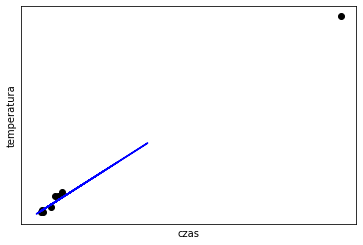

In [44]:

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# predykcja dla danych testowych
y_pred = regr.predict(x_test)

# współczynnik regresji
print('Współczynnik regesji: \n', regr.coef_)
# średni bład kwadratowyy
print('średni błąd kwadratowy: %.2f'
      % mean_squared_error(y_test, y_pred))
# współczynnik determinacji 
print('współczynnik determinacji: %.2f'
      % r2_score(y_test, y_pred))

#print(x_train)
#print("_-----")
#print(regr.predict(x_train))

# wykresy
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_train, regr.predict(x_train), color='blue')
plt.xlabel("czas")
plt.ylabel("spalone kalorie")
plt.grid(True)

plt.xticks(())
plt.yticks(())

plt.show()

MNK używamy gdy np. chcemy zlinearyzować model (można wielomian włożyć w macierz wejść i parametrów)
Kiedy możemy operować na gołych(nie modelujemy w żaden dodatkowy sposób) parametrach, czyli estymuje wartość mierzonej wielkości.
Zakłócenia są addytywne(sumują się). 
Wartość oczekiwana zakłóceń jest 0.
